In [1]:
import cv2 as cv
import numpy as np 
import math
from matplotlib import pyplot as plt

In [2]:
img_0 = cv.imread('/home/felipe/Desktop/PDI_2020_1/standard_test_images/cameraman.tif')
img_1 = cv.imread('/home/felipe/Desktop/PDI_2020_1/standard_test_images/lake.tif')

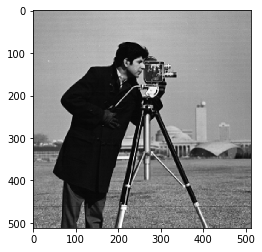

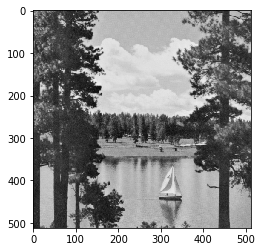

Cameraman size: (512, 512, 3)
Lake size: (512, 512, 3)


In [3]:
plt.imshow(img_0)
plt.show()
plt.imshow(img_1)
plt.show()
print("Cameraman size: "+str(img_0.shape))
print("Lake size: "+str(img_1.shape))


In [4]:
def is_power(n):
    if math.log2(n).is_integer():
        return True
    else: 
        return False   

In [5]:
def pixel_elimination(img, jump, parity, mirror):
    aux_img = np.zeros_like(mirror)
    #if parity == 0:
    aux = 0
    jump_count = -1
    for i in range(img.shape[0]):
        jump_count = jump_count + 1
        if jump_count == jump:
            jump_count = 0
        if jump_count == 0:
            aux_img[aux,:] = img[i,:] 
            aux = aux + 1
    return aux_img

In [6]:
def downresize_p2(img, reduction):
    """This fucntion does the downsampling of the input Image"""
    if not(is_power(reduction) and img.shape[0] == img.shape[1]):
        print("This down resize just made power of 2 recizing") 
        return img    
    else: 
        jumps = reduction
        n_dimension = int(img.shape[0]/reduction)
        new_image = np.zeros((n_dimension,n_dimension,img.shape[2]), dtype = np.uint8)
        aux_image = np.zeros((n_dimension,img.shape[1],img.shape[2]), dtype = np.uint8)
        aux = 0
        j_count = -1
        for i in range(img.shape[0]):
            j_count = j_count + 1
            if j_count == jumps:
                j_count = 0
            if j_count == 0:
                aux_image[aux,:,:] = img[i,:,:]    
                aux = aux + 1
        aux = 0        
        for i in range(n_dimension): 
                new_image[i,:,:] = pixel_elimination(aux_image[i,:,:],jumps, aux, new_image[i,:,:]) 
    new_image = np.uint8(new_image)
    return new_image

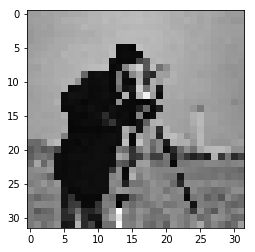

In [7]:
new_image = downresize_p2(img_0,16)
plt.imshow(new_image)
plt.show()

In [8]:
def pixel_spacing(img, jump, parity, mirror, rows, set_points):
    new_img = np.zeros_like(mirror)
    pixel_set_point = np.zeros_like(set_points)
    #if parity == 0:
    aux = 0
    jump_count = -1
    for i in range(new_img.shape[0]):
        jump_count = jump_count + 1
        if jump_count == jump:
            jump_count = 0
        if jump_count == 0:
            new_img[i,:] = img[aux,:] 
            pixel_set_point[i] = rows[aux]
            aux = aux + 1
    return new_img, pixel_set_point

In [9]:
def search_nearest(img, search_range, row, collum, validation):
    search_matrix = np.zeros((search_range,search_range), dtype=np.uint8)
    if row - search_range < 0:
        r0 = 0
    else:
        r0 = row - search_range

    if collum - search_range <  0: 
        c0 = 0  
    else:
        c0 = collum - search_range 

    if row + search_range  > img.shape[0]:
        r1 = img.shape[0]
    else: 
        r1 = row + search_range 

    if collum + search_range > img.shape[0]: 
        c1 = img.shape[0]   
    else:
        c1 = collum + search_range 
    distance = np.sqrt((r0)**2+(c0)**2)
    near = img[r0,c0]
    for i in range(r0+1,r1,1):
        for j in range(c0+1,c1,1):
            distance1 = np.sqrt((row - i)**2+(collum - j)**2)
            if distance1 < distance:
                if validation[i,j] !=0:
                    near = img[i,j]
    return near            

In [10]:
def nni_interpolation(img, set_points,jumps):
    image = img
    for i in range(set_points.shape[0]):
        for j in range(set_points.shape[1]):
            if set_points[i,j] == 0:
                image[i,j] = search_nearest(img, jumps, i, j, set_points)
    return image

In [11]:
def upresize_p2(img, ampliation):
    """This fucntion does the downsampling of the input Image"""
    if not(is_power(ampliation) and img.shape[0] == img.shape[1]):
        print("This down resize just made power of 2 recizing") 
        return img    
    else: 
        jumps = ampliation
        n_dimension = int(img.shape[0]*ampliation)
        new_image = np.zeros((n_dimension,n_dimension,img.shape[2]), dtype = np.uint8)
        pixel_set_point = np.zeros((n_dimension,n_dimension), dtype = np.uint8)
        aux_image = np.zeros((n_dimension,img.shape[1],img.shape[2]), dtype = np.uint8)
        row_position = np.zeros((n_dimension,img.shape[1]), dtype = int)
        aux = 0
        j_count = -1
        for i in range(aux_image.shape[0]):
            j_count = j_count + 1
            if j_count == jumps:
                j_count = 0
            if j_count == 0:
                aux_image[i,:,:] = img[aux,:,:]  
                row_position[i,:] = np.ones(img.shape[1], dtype = np.uint8)  
                aux = aux + 1
        aux = 0        
        for i in range(n_dimension): 
            (new_image[i,:,:],pixel_set_point[i,:]) = pixel_spacing(aux_image[i,:,:],jumps, aux, new_image[i,:,:], row_position[i,:], pixel_set_point[i,:]) 
                
    new_image = nni_interpolation(new_image,pixel_set_point,jumps)            
    new_image = np.uint8(new_image)
    pixel_set_point = np.uint8(pixel_set_point)
    return new_image, pixel_set_point

In [38]:
recize_i, pixels = upresize_p2(new_image,16)
plt.imshow(recize_i)
plt.show()
plt.imshow(pixels)
plt.show()

KeyboardInterrupt: 